In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import glob

In [2]:
files = glob.glob("data1_day1/*.txt")

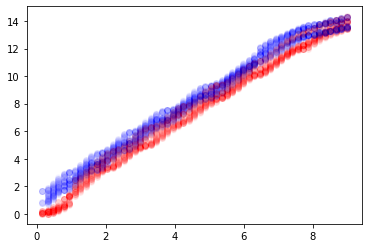

In [3]:
data = np.loadtxt(files[0], skiprows=3)
zeros = find_peaks(-data[:,2], height=-1, distance=1000)[0]
lengths = np.diff(zeros)
idxs = [0, 2, 3, 5]
for i in idxs:
# for _ in range(1):
#     i = 
    start = zeros[i]
    end = zeros[i]+lengths[i]
    driving_volt = data[start:end,2]
    max_detector_voltage = np.max(data[start:end,1])
    intensity = data[start:end,1]/max_detector_voltage

    # plt.plot(driving_volt, intensity)
    turning_point = int(lengths[i]/2)
    part1 = np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[:turning_point])
    part2 = part1[-1] - np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[turning_point:lengths[i]])
    # plt.plot(part1)
    # plt.plot(part2)
    plt.plot(driving_volt[0:turning_point], part1, 'ro', alpha=0.02)
    plt.plot(driving_volt[turning_point:lengths[i]-1], part2, 'bo', alpha=0.02)

In [23]:
max_detector_voltage = np.max(data[start:end,1])
intensity = data[start:end,1]/max_detector_voltage

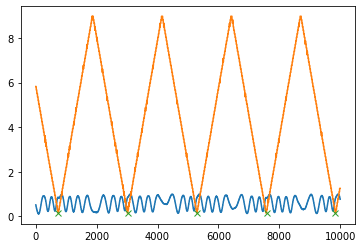

In [46]:
plt.plot(intensity)
plt.plot(driving_volt)

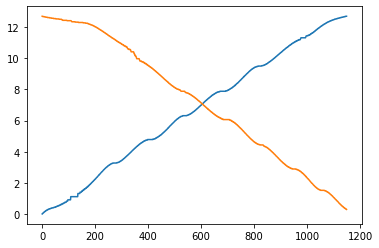

In [11]:
triangle_len = 2300
turning_point = int(triangle_len/2)

part1 = np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[:turning_point])
part2 = part1[-1] - np.cumsum(np.abs(np.diff(np.arccos(2*intensity-1)))[turning_point:triangle_len])
plt.plot(part1)
plt.plot(part2)

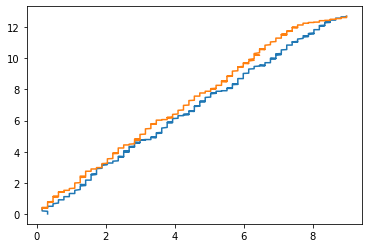

In [12]:
plt.plot(driving_volt[0:turning_point], part1)
plt.plot(driving_volt[turning_point:triangle_len], part2)